<a href="https://colab.research.google.com/github/Sidharth1999/Capstone-3/blob/main/Data_Wrangling_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I will be be extracting the Indian Food Images Dataset from Kaggle and wrangling the data to a form that's ideal for modeling. I will also perform some basic EDA on the dataset to get a better sense of what type of data the models will need to deal with

In [5]:
#Imports
import pandas as pd
import numpy as np
import os
import pathlib
import imageio
import functools
import math
import matplotlib.pyplot as plt
import seaborn as sns

First, I define the directories that I will be storing the dataset and information of the models on Google Drive. Note that you also need to mount Google Drive (left menu of Colab) to access these directories

In [2]:
projectDir = "/content/drive/My Drive/Springboard-Capstone-3"
dataDir = projectDir + "/" + "data"

# **Download Dataset from Kaggle**

We are going to use the Kaggle API to directly download the dataset from [Indian Food Images Dataset](https://www.kaggle.com/iamsouravbanerjee/indian-food-images-dataset) To do this, you need to download the kaggle.json file from Kaggle as an API key. I upload it to the runtime with the following cell:

In [ ]:
from google.colab import files
files.upload()

Run the commands to setup kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Verify that kaggle commands work
! kaggle datasets list

Finally, download the dataset

In [ ]:
dataset1 = "iamsouravbanerjee/indian-food-images-dataset"

In [ ]:
!kaggle datasets download $dataset1 -p "$dataDir" --unzip

# **Preparing the data**

All the data is in one folder called "data" in the project - we want to divide this data into a train, validation, and test set. So, we divide up the dataset into directories for each of these

In [ ]:
#Make separate directories for each set
os.mkdir(os.path.join(projectDir, "train"))
os.mkdir(os.path.join(projectDir, "validation"))
os.mkdir(os.path.join(projectDir, "test"))

In [ ]:
trainDir = projectDir + "/" + "train"
validationDir = projectDir + "/" + "validation"
testDir = projectDir + "/" + "test"

In [3]:
#Obtain all 80 categories
categories = []
for file in os.listdir(dataDir): categories.append(file)
print(categories)

['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani', 'boondi', 'butter_chicken', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'chhena_kheeri', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja', 'kalakand', 'karela_bharta', 'kofta', 'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol', 'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti', 'misti_doi', 'modak', 'mysore_pak', 'naan', 'navrattan_korma', 'palak_paneer', 'paneer_butter_masala', 'phirni', 'pithe', 'poha', 'poornalu', 'pootharekulu', 'qubani_ka_meetha', 'rabri', 'ras_malai', 'ras

In [22]:
#Extract all 4000 image paths for each of the 80 categories
def imagePathsFromCategory(category):
  generator = pathlib.Path(dataDir + '/' + category).glob('*.jpg')
  sorted_paths = sorted([x for x in generator])
  return sorted_paths 

image_paths = [imagePathsFromCategory(category) for category in categories]

#Confirm all 4000 image paths were extracted:
print(functools.reduce(lambda a, b: a+b, [len(categoryPaths) for categoryPaths in image_paths]))

4000


In [ ]:
#Split each of the 80 categories into train, validation, and test
from sklearn.model_selection import train_test_split
train = []
validation = []
test = []
for i in range(len(image_paths)):
  train_images, test_images, _, _ = train_test_split(image_paths[i], range(len(image_paths[i])), test_size=0.20, random_state=42)
  train_images, validation_images, _, _ = train_test_split(train_images, range(len(train_images)), test_size=0.20, random_state=42)
  train.append(train_images)
  validation.append(validation_images)
  test.append(test_images)

In [ ]:
#Insert data from each category into the newly created train, validation, and test folders
for i in range(len(categories)):
  category = categories[i]
  train_set = train[i]
  validation_set = validation[i]
  test_set = test[i]
  trainDestDir = os.path.join(trainDir, category)
  valDestDir = os.path.join(validationDir, category)
  testDestDir = os.path.join(testDir, category)
  os.mkdir(trainDestDir)
  os.mkdir(valDestDir)
  os.mkdir(testDestDir)

  for j in range(len(train_set)):
    impath = os.path.join(trainDestDir, f'image{j}.jpg')
    imageio.imwrite(impath, imageio.imread(train_set[j]))

  for j in range(len(validation_set)):
    impath = os.path.join(valDestDir, f'image{j}.jpg')
    imageio.imwrite(impath, imageio.imread(validation_set[j]))

  for j in range(len(test_set)):
    impath = os.path.join(testDestDir, f'image{j}.jpg')
    imageio.imwrite(impath, imageio.imread(test_set[j]))

# **Exploratory Data Analysis**

Now, we inspect the data to find really anything interesting about it. Let's start off by checking how the classes are distributed

In [8]:
categoryCounts = []
for category in categories:
  categoryDir = os.path.join(dataDir, category)
  numImages =  len([name for name in os.listdir(categoryDir) if os.path.isfile(os.path.join(categoryDir, name))])
  categoryCounts.append(numImages)

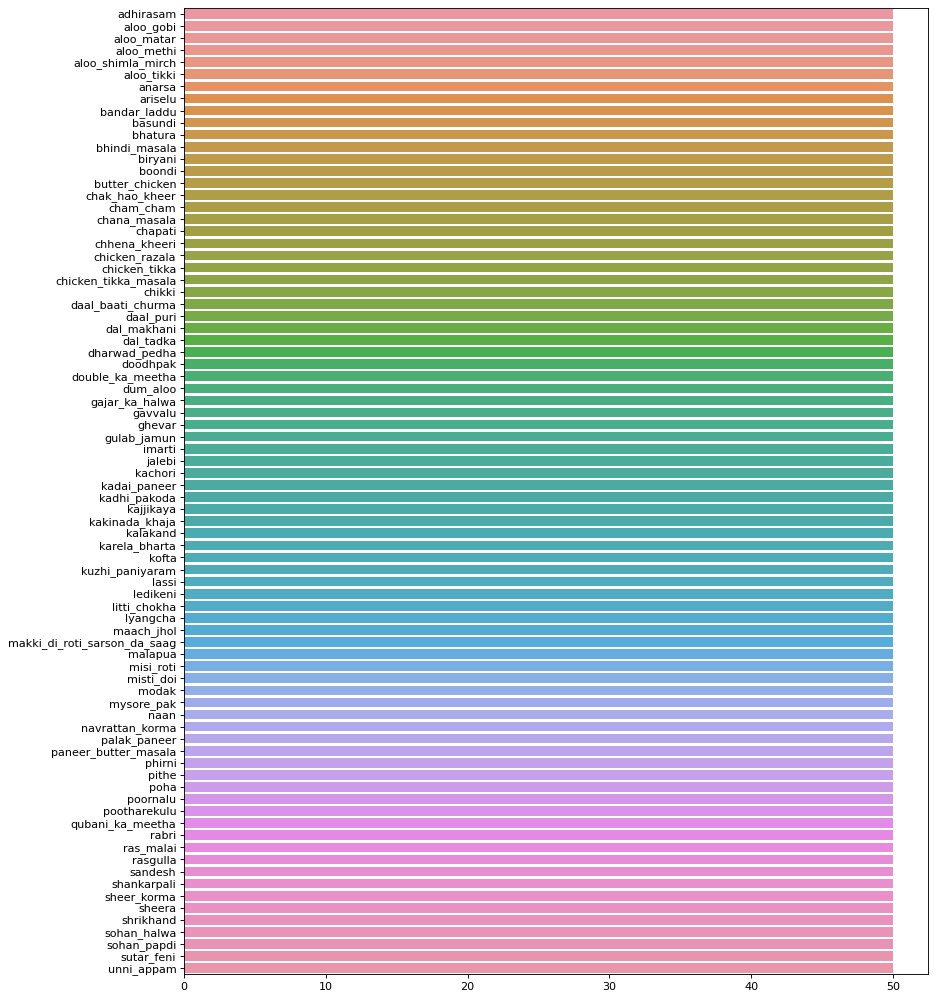

In [16]:
plt.figure(figsize=(12, 16), dpi=80)
sns.barplot(y=categories, x=categoryCounts)

Great! The classes are perfectly balanced (and as a consequence, the training, validation and test sets are too). This should help build more robust classification models since no class will dominate the other during training

Now, let's look at some of the images! We choose 5 random classes to look at 3 images each from 

In [40]:
indices = np.random.choice(80, 5)
randomCategories = np.array(categories)[indices]
randomCategoriesImagePaths = np.array(image_paths)[indices]
print(randomCategories)

['navrattan_korma' 'maach_jhol' 'dal_tadka' 'palak_paneer' 'chana_masala']


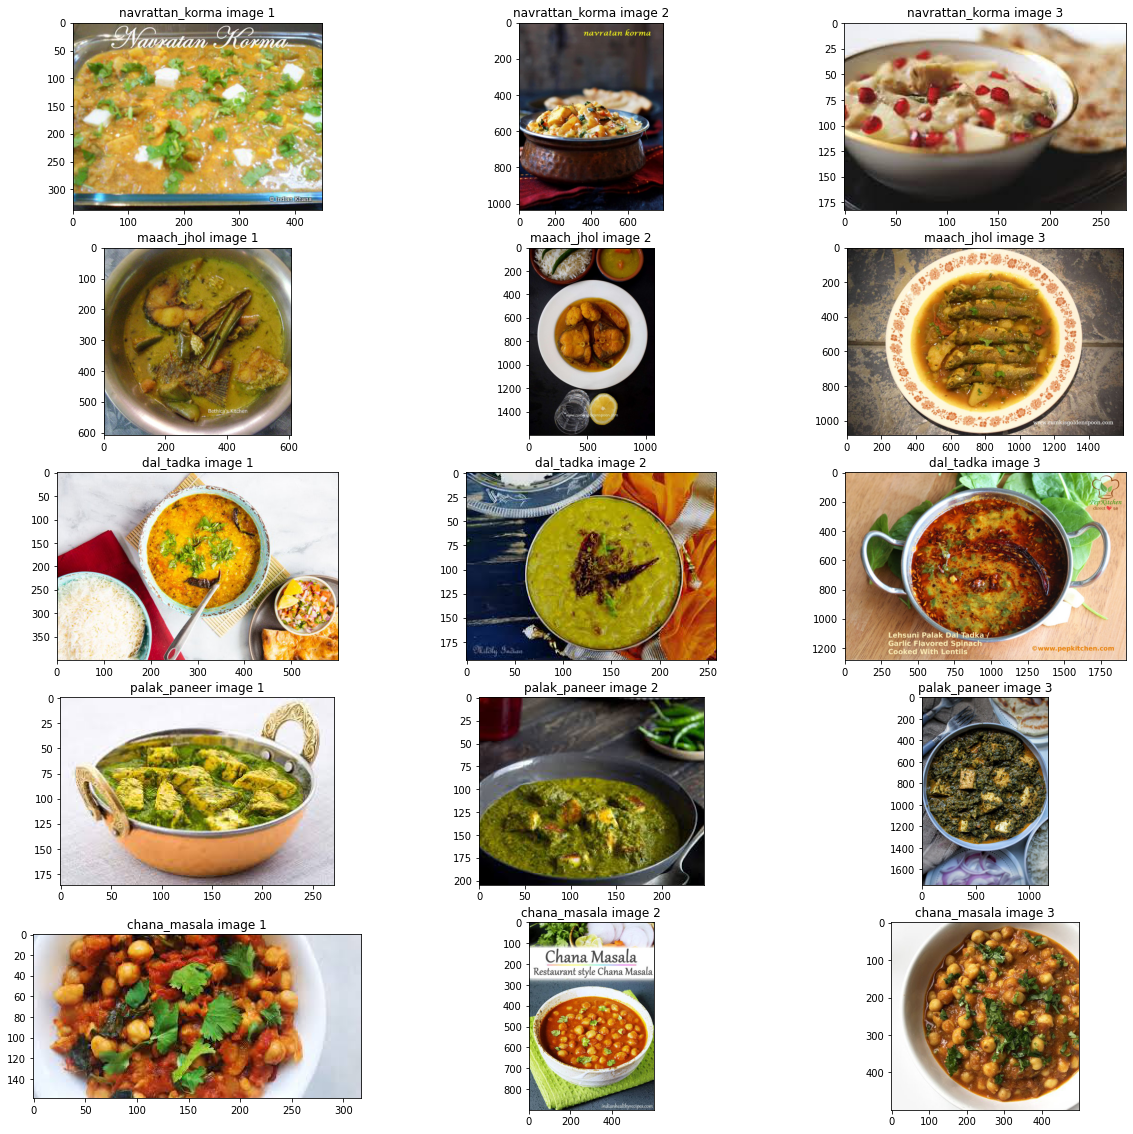

In [41]:
fig = plt.figure(figsize=(20, 20))
for i in range(len(randomCategories)):
  category = randomCategories[i]
  imagePaths = randomCategoriesImagePaths[i]
  indices = np.random.choice(50, 3)
  randomImagePaths = np.array(imagePaths)[indices]
  for j in range(len(randomImagePaths)):
    imagePath = randomImagePaths[j]
    image = imageio.imread(imagePath)
    ax = fig.add_subplot(5, 3, 3*i + (j+1))
    ax.imshow(image)
    ax.set_title(f'{category} image {j+1}')

Running the random image generator a couple of times, you will eventually notice that some of these images have text in them identifying the type of food it is. This can turn out to be a problem when the CNN is training and gets distracted or mislead by text features that aren't representative of the actual food itself. 

There are really only 2 solutions to this - manually going through all 4000 images and removing images like these, or figuring out some way to automate that process ... and that itself is an image classification task. For now, we will accept that that's the way these images are and our model will just need to learn to deal with that

Another useful piece of information might be understanding what the resolution of the images looks like for the dataset. From the above images, it's pretty clear that there is a decent amount of variation. We investigate that now.

In [42]:
avg_widths = []
avg_heights = []
for categoryPaths in image_paths:
  width_sum = 0
  height_sum = 0
  for imagePath in categoryPaths:
    image = imageio.imread(imagePath)
    height_sum += image.shape[0]
    width_sum += image.shape[1]
  avg_widths.append(width_sum//50)
  avg_heights.append(height_sum//50)

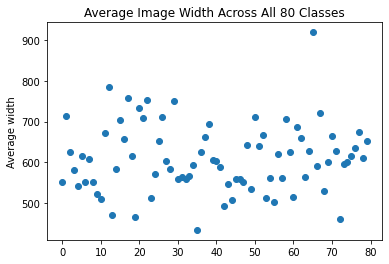

In [43]:
plt.scatter(np.arange(80), avg_widths)
plt.title('Average Image Width Across All 80 Classes')
plt.ylabel('Average width')
plt.show()

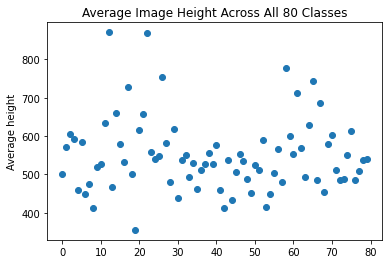

In [44]:
plt.scatter(np.arange(80), avg_heights)
plt.title('Average Image Height Across All 80 Classes')
plt.ylabel('Average height')
plt.show()

It seems that the average width and height of the images ranges randomly between 400 and 800. We can use this information when we build Keras image generators that resize the images when they flow from the directories during training. We wouldn't want to change the resolution too much as that could affect the CNNs ability to recognize key spatial features

That pretty much wraps the wrangling and EDA of the dataset. One might perform some useful image transformations prior to training, but Keras takes care of most morphological transformations like rotating, shearing, resizing, etc which should suffice for now. All that's left is training the models now. 